In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'FDistance'
gcolors = ['blue', 'orange', 'red']
gbins = [2.0, 4.0, 6.0, 10.0]

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
#tragitti = tragitti[tragitti['Month'] == 4]

In [2]:
hour_length_freq = pd.crosstab(
    index=tragitti['Hour'],
    columns=pd.cut(tragitti[distance_param], bins=gbins))

hour_length_freq = hour_length_freq.reindex([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0])
hour_length_freq

FDistance,"(2.0, 4.0]","(4.0, 6.0]","(6.0, 10.0]"
Hour,,,
7,3010,2826,1146
8,2931,2818,1156
9,2968,2847,1193
10,2953,2857,1223
11,3002,2867,1157
12,3055,2895,1210
13,3098,2874,1245
14,3098,2909,1300
15,3138,2894,1212


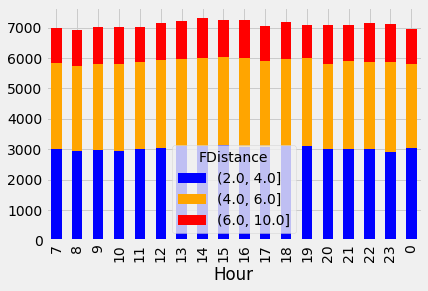

In [3]:
hour_length_freq.plot.bar(color=gcolors, stacked=True)
plt.show()

In [4]:
length_hour_freq = pd.crosstab(
    index=pd.cut(tragitti[distance_param], bins=gbins),
    columns='Abs. frequence')

(length_hour_freq / sum(length_hour_freq.values)) \
    .apply(lambda p: np.round(p, 4)*100) \
    .astype(str) \
    .apply(lambda s: s + '%')

col_0,Abs. frequence
FDistance,
"(2.0, 4.0]",42.71%
"(4.0, 6.0]",40.34%
"(6.0, 10.0]",16.95%


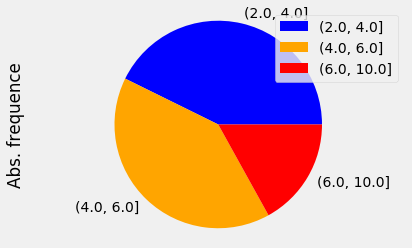

In [5]:
length_hour_freq.plot.pie('Abs. frequence', colors=gcolors)
plt.axis('equal')
plt.show()